OptaPyDOS example - Density of States of Silicon
==========================
From those great kids that brought you OptaDOS and J. Kermode, a gentleman.

Prerequisites:

* OptaDOS complied using gfortran. `make`
* OptaPyDOS python libraries. `make python`
* CASTEP run in optados/eaxmples/Si2_DOS. `castep Si2`
* OptaPyDOS_Tools which should be found in `optados/python`

In [3]:
import os
os.environ['GFORTRAN_CONVERT_UNIT'] = 'big_endian' # Must do this BEOFRE invoking OptaPyDOS
%matplotlib inline
import OptaPyDOS as opd        # OptaPyDOS Low level functions
import OptaPyDOS_Tools as opdt # OptaPyDOS wrapper scripts
import matplotlib.pyplot as plt
import numpy as np

Let's do something obvious and check that both modules are set up ok.

In [4]:
print " OptaDOS version:", opd.od_constants.optados_version
print " OptaPyDOS Tools version:", opdt.od_OptaPyDOS_tools_version

 OptaDOS version:  1.2  
 OptaPyDOS Tools version: 1.0


If you managed two get to version numbers printed out above then you have `opd` and `opdt` working. Now lets read in an `odi` file using `od_setup_from_file` is a function to initilaise OptaPyDOS

In [5]:
opdt.od_setup_from_file('../examples/Si2_DOS/Si2')

 OptaPyDOS Tools -- Setup Calculation from Seedname
 Seedname: ../examples/Si2_DOS/Si2                           


One may then tweak the input parameters.

In [6]:
opd.od_parameters.dos_spacing=0.1

We might as well do all three types of smearing

In [7]:
opd.od_parameters.adaptive=1
opd.od_parameters.linear=1
opd.od_parameters.fixed=1

We are now all set up call the routine to calculate the DOS.

In [8]:
opd.od_dos_utils.dos_utils_calculate() # Calculate the DOS

In [11]:
chemical_potential = opdt.od_set_efermi() # Get the Fermi level, and set the energy scale opd.od_dos_utils.e

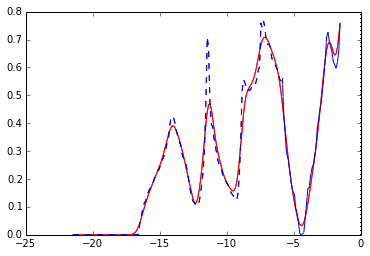

In [12]:
plt.plot(opd.od_dos_utils.e[0:200],opd.od_dos_utils.dos_fixed[0:200],color='red');
plt.plot(opd.od_dos_utils.e[0:200],opd.od_dos_utils.dos_linear[0:200],color='blue',linestyle="dashed");
plt.axvline(x=chemical_potential, ymin=0.0, ymax =1.0, linewidth=2,color='black',linestyle="dotted")